# Chapter: 7 (Aggregation, Min, Max and Everything in Between)

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('president_heights.csv')

In [3]:
data

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183
5,6,John Quincy Adams,171
6,7,Andrew Jackson,185
7,8,Martin Van Buren,168
8,9,William Henry Harrison,173
9,10,John Tyler,183


In [5]:
import numpy as np
heights = np.array(data['height(cm)'])

In [6]:
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


In [7]:
print("Mean height: ", heights.mean())

Mean height:  179.73809523809524


In [9]:
print("Standard deviation:", heights.std())

Standard deviation: 6.931843442745892


In [11]:
print("Mininum height:", heights.min())

Mininum height: 163


In [12]:
print("Maximum height:", heights.max())

Maximum height: 193


In [13]:
df = pd.DataFrame({
    'Order': [1,2,3],
    'Name': ['George Washington', 'John Adams', 'Thomas Jefferson'],
    'Heights': [189, 170,189]})

In [14]:
df

,Order,Name,Heights
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189


In [16]:
df.describe()

,Order,Heights
count,3.0,3.000000
mean,2.0,182.666667
std,1.0,10.969655
min,1.0,170.000000
25%,1.5,179.500000
50%,2.0,189.000000
75%,2.5,189.000000
max,3.0,189.000000


In [36]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [47]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use('seaborn-v0_8-whitegrid')

In [48]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height(cm)')
plt.ylabel('number');

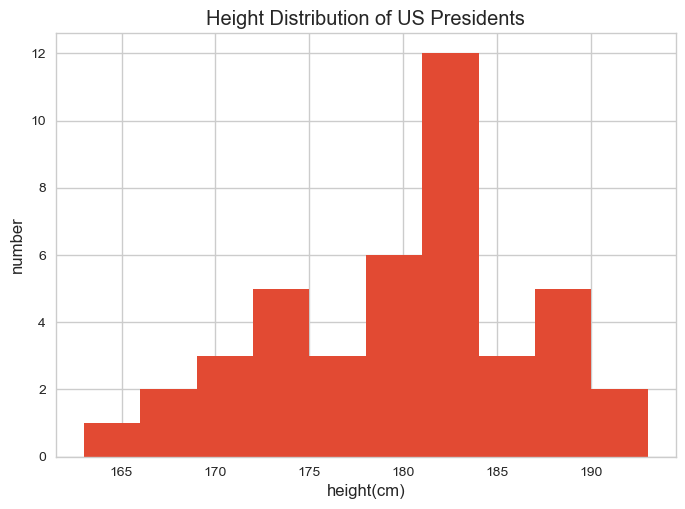

In [49]:
plt.show()

# Chapter 10: Fancy Indexing

**Exploring Fancy Indexing**

In [3]:
import numpy as np
rng = np.random.default_rng(seed=1701)

x = rng.integers(100, size=10)
print(x)

[90 40  9 30 80 67 39 15 33 79]


In [4]:
[x[3], x[7], x[2]]

[np.int64(30), np.int64(15), np.int64(9)]

In [5]:
ind = [3, 7, 4]
x[ind]

array([30, 15, 80])

In [6]:
ind = np.array([[3, 7], 
                [4, 5]])
x[ind]

array([[30, 15],
       [80, 67]])

In [8]:
X = np.arange(12).reshape((3,4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [9]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

In [10]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

**Example: Selecting Random Points**

In [14]:
mean = [0, 0]
cov = [[1, 2],
       [2,5]]

X = rng.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

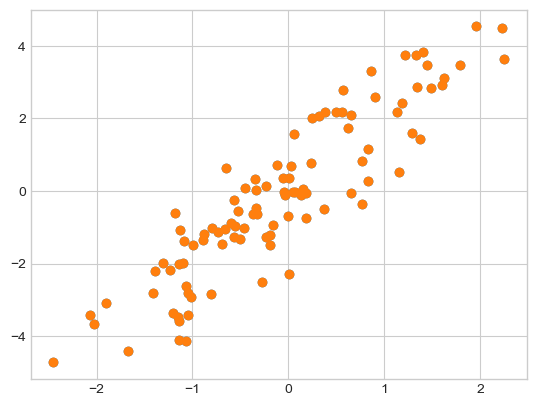

In [16]:
%matplotlib inline 
import matplotlib.pyplot as plt 
plt.style.use('seaborn-v0_8-whitegrid')
plt.scatter(X[:, 0], X[:, 1])
plt.show();

In [17]:
indices = np.random.choice(X.shape[0], 20, replace =False)
indices

array([74, 15,  8, 42, 71, 62, 75, 57, 46, 38, 99, 77, 69, 33, 26,  2, 37,
       13, 70, 56], dtype=int32)

In [18]:
selection = X[indices] 
selection.shape

(20, 2)

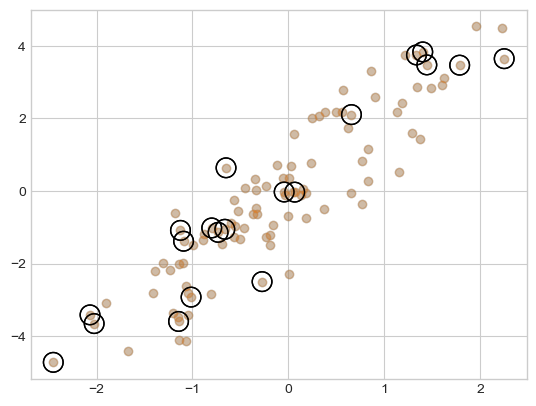

In [20]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='none', edgecolor='black', s=200)
plt.show();

In [23]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99 
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [24]:
x[i] -=10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [25]:
x = np.zeros(10)
x[[0,0]] = [4,6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


**Example: Binning Data**

In [27]:
rng = np.random.default_rng(seed=1701)
x = rng.normal(size=100)

#compute a histogram by hand 

bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x 
i = np.searchsorted(bins, x)

# add 1 to each of these bins 
np.add.at(counts, i, 1)


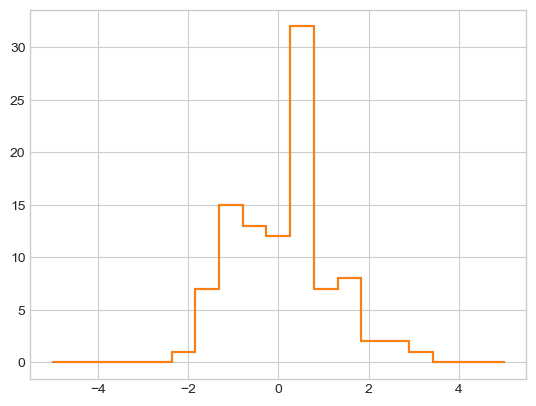

In [29]:
# plot the results 
plt.plot(bins, counts, drawstyle='steps')
plt.show();